<a href="https://colab.research.google.com/github/MrSimple07/ArchitecturesNN_for_DL/blob/main/PyTorch_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#Two_sum question
def two_sum(arr, target):
  dict1 = {}
  for i, num in enumerate(arr):
    first_num = target - num

    if first_num in dict1:
      return [dict1[first_num], num]
    dict1[num] = i

arr = [1,2,4,5,6,8]
target = 10

print(two_sum(arr, target))




[2, 6]


# Pytorch Practice

Epoch [100/1000], Loss: 2.0482
Epoch [200/1000], Loss: 1.3576
Epoch [300/1000], Loss: 1.1188
Epoch [400/1000], Loss: 1.0361
Epoch [500/1000], Loss: 1.0076
Epoch [600/1000], Loss: 0.9977
Epoch [700/1000], Loss: 0.9942
Epoch [800/1000], Loss: 0.9931
Epoch [900/1000], Loss: 0.9927
Epoch [1000/1000], Loss: 0.9925
Learned parameters:
linear.weight: 1.9962635040283203
linear.bias: 3.205625534057617


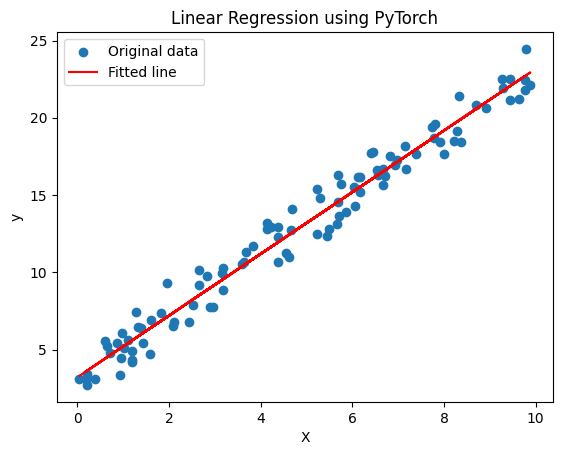

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 2 * X + 3 + np.random.randn(100, 1)

X_tensor = torch.tensor(X, dtype = torch.float32)
y_tensor = torch.tensor(y, dtype = torch.float32)

class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegression()

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 1000
for epoch in range(num_epochs):
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

with torch.no_grad():
    predicted = model(X_tensor).numpy()

print("Learned parameters:")
for name, param in model.named_parameters():
    print(f'{name}: {param.item()}')

import matplotlib.pyplot as plt
plt.scatter(X, y, label='Original data')
plt.plot(X, predicted, color='red', label='Fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression using PyTorch')
plt.legend()
plt.show()